In [4]:
import pandas as pd

df = pd.read_csv(r'C:\UMER\ML\data\crop_yield.csv')
print(df.head())
print(df.info())
print(df.describe())


  Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0   West     Sandy   Cotton   897.077239            27.676966   
1  South      Clay     Rice   992.673282            18.026142   
2  North      Loam   Barley   147.998025            29.794042   
3  North     Sandy  Soybean   986.866331            16.644190   
4  South      Silt    Wheat   730.379174            31.620687   

   Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0            False             True            Cloudy              122   
1             True             True             Rainy              140   
2            False            False             Sunny              106   
3            False             True             Rainy              146   
4             True             True            Cloudy              110   

   Yield_tons_per_hectare  
0                6.555816  
1                8.527341  
2                1.127443  
3                6.517573  
4                7.24825

In [5]:
# Check for nulls
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # or use df.fillna(method='ffill')


Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Convert boolean columns
df['Fertilizer_Used'] = df['Fertilizer_Used'].astype(int)
df['Irrigation_Used'] = df['Irrigation_Used'].astype(int)


<Axes: xlabel='Yield_tons_per_hectare', ylabel='Count'>

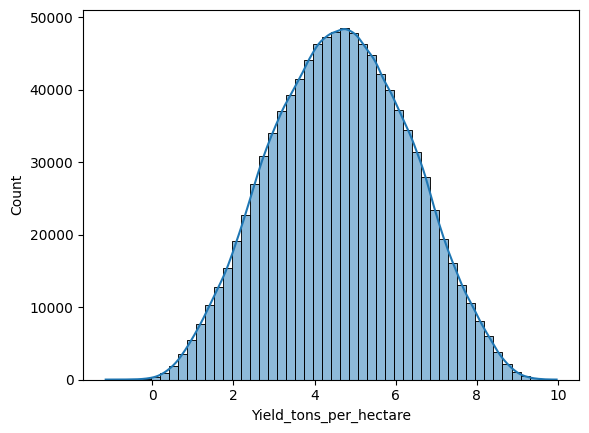

In [7]:
import seaborn as sns
sns.histplot(df['Yield_tons_per_hectare'], bins=50, kde=True)


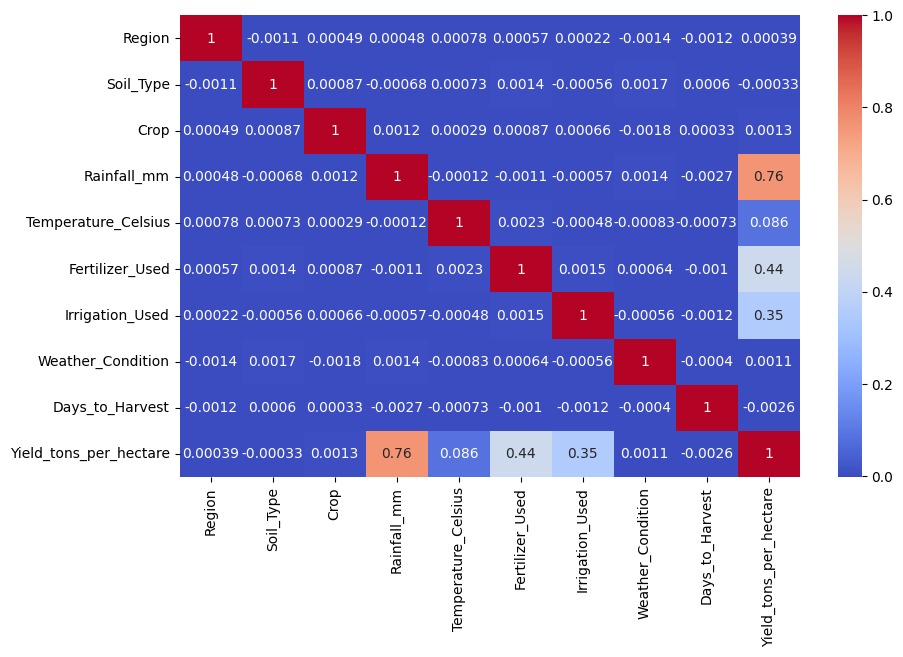

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [9]:
encoding_maps = {
    'Region': {'North': 0, 'East': 1, 'South': 2, 'West': 3},
    'Soil_Type': {'Clay': 0, 'Sandy': 1, 'Loam': 2, 'Silt': 3, 'Peaty': 4, 'Chalky': 5},
    'Crop': {'Wheat': 0, 'Rice': 1, 'Maize': 2, 'Barley': 3, 'Soybean': 4, 'Cotton': 5},
    'Weather_Condition': {'Sunny': 0, 'Rainy': 1, 'Cloudy': 2}
}

import joblib
joblib.dump(encoding_maps, '../model/encoding_maps.pkl')


['../model/encoding_maps.pkl']

In [10]:
X = df.drop('Yield_tons_per_hectare', axis=1)
y = df['Yield_tons_per_hectare']


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVM": SVR(kernel='rbf')  # You can change to 'linear' for speed
}

results = {}

for name, model in models.items():
    if name == "SVM":
        # Optional: train SVM on smaller set for speed if needed
        model.fit(X_train[:1000], y_train[:1000])
        preds = model.predict(X_test[:1000])
        rmse = np.sqrt(mean_squared_error(y_test[:1000], preds))
        r2 = r2_score(y_test[:1000], preds)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, preds))
        r2 = r2_score(y_test, preds)
        
    results[name] = (model, rmse, r2)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")

Linear Regression - RMSE: 0.50, R²: 0.91


KeyboardInterrupt: 

In [8]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predict
preds_xgb = xgb.predict(X_test)

# Calculate RMSE manually
rmse = np.sqrt(mean_squared_error(y_test, preds_xgb))
r2 = r2_score(y_test, preds_xgb)

print(f"XGBoost - RMSE: {rmse:.2f}, R²: {r2:.2f}")


XGBoost - RMSE: 0.50, R²: 0.91


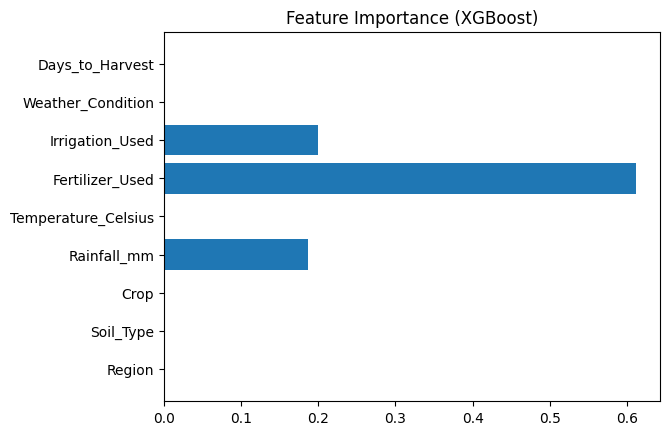

In [9]:
import matplotlib.pyplot as plt

importances = xgb.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title('Feature Importance (XGBoost)')
plt.show()



In [10]:
import joblib

best_model_name = "SVM"
best_model = results[best_model_name][0]

joblib.dump(best_model, 'best_crop_yield_model.pkl')
print(f"✅ {best_model_name} saved successfully!")

✅ SVM saved successfully!


✅ Model uploaded to Azure Blob Storage successfully!
